## Creating and loading messidor dataset


In [63]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image



In [64]:
device='cpu'
if(torch.cuda.is_available()):
    device = torch.device('cuda')
elif(torch.has_mps):
    device = torch.device('mps' if torch.has_mps else 'cpu')

device

device(type='mps')

In [65]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [66]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [67]:
root_dir = './messidor'
subset = 'Base11'

In [68]:
walk_through_dir(root_dir)
os.listdir(os.path.join(root_dir))

There are 12 directories and 13 images in './messidor'.
There are 0 directories and 101 images in './messidor/Base12'.
There are 0 directories and 101 images in './messidor/Base24'.
There are 0 directories and 101 images in './messidor/Base23'.
There are 0 directories and 101 images in './messidor/Base22'.
There are 0 directories and 101 images in './messidor/Base13'.
There are 0 directories and 101 images in './messidor/Base14'.
There are 0 directories and 101 images in './messidor/Base31'.
There are 0 directories and 101 images in './messidor/Base11'.
There are 0 directories and 101 images in './messidor/Base21'.
There are 0 directories and 101 images in './messidor/Base32'.
There are 0 directories and 101 images in './messidor/Base34'.
There are 0 directories and 101 images in './messidor/Base33'.


['Annotation_Base33.xls',
 'Annotation_Base32.xls',
 'Annotation_Base24.xls',
 'Annotation_Base31.xls',
 'Annotation_Base21.xls',
 '.DS_Store',
 'Base12',
 'Base24',
 'Annotation_Base34.xls',
 'Base23',
 'Annotation_Base22.xls',
 'Base22',
 'Base13',
 'Base14',
 'Annotation_Base23.xls',
 'Base31',
 'Base11',
 'Base21',
 'Annotation_Base12.xls',
 'Base32',
 'Annotation_Base13.xls',
 'Annotation_Base11.xls',
 'Base34',
 'Base33',
 'Annotation_Base14.xls']

In [69]:
# dataset = MessidorDataset(root_dir, subset, transform=transform)

# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [70]:
# #testing the loading of images

# t_labels = pd.read_excel(os.path.join(root_dir, f'Annotation_{subset}.xls') )

# # t_labels.drop(['Risk of macular edema '], axis=1, inplace=True)
# # t_labels.drop(['Ophthalmologic department'], axis=1, inplace=True)
# t_labels.head()

In [71]:
# # t_labels=t_labels.drop(['Ophthalmologic department'])
# t_labels.drop(['Risk of macular edema '], axis=1, inplace=True)
# t_labels.drop(['Ophthalmologic department'], axis=1, inplace=True)
# t_labels.head()

In [72]:
# t_labels.drop(['Ophthalmologic department'], axis=1, inplace=True)
# t_labels

In [73]:
# t_labels.head()

In [74]:
# len(t_labels)
# t_labels["Image name"][0]
# os.path.join(root_dir, subset, t_labels["Image name"][0])

In [75]:
# import matplotlib.pyplot as plt
# import cv2 


# img=cv2.imread(os.path.join(root_dir, subset, t_labels["Image name"][0]))
# img.shape


In [76]:
# import matplotlib.pyplot as plt

# # Get a batch of data from the dataloader
# images, labels = next(iter(dataloader))

# # Define a function to display a batch of images with their labels
# def show_batch(images, labels):
#     fig, axs = plt.subplots(4, 8, figsize=(16, 8))
#     axs = axs.ravel()
#     for i in range(len(images)):
#         axs[i].imshow(images[i].permute(1, 2, 0))
#         axs[i].set_title(f'Grade: {labels[i]}')
#         axs[i].axis('off')
#     plt.tight_layout()
#     plt.show()

# # Display the batch of images with their labels
# show_batch(images, labels)


In [77]:
# # Step 4: Create DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
# # valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4)
# train_loader

# Loading all the images from dataset

In [78]:
from PIL import ImageOps

def enhance_image(image):
    return ImageOps.equalize(image)



In [79]:
import os
import pandas as pd
from PIL import Image

# Directory where the messidor data is stored
data_dir = './messidor'

# Initialize lists to store image data and labels
images = []
labels = []

# Loop through all excel files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.xls'):
        # Load the excel file
        df = pd.read_excel(os.path.join(data_dir, filename))
        
        # Loop through all images listed in the excel file
        for index, row in df.iterrows():
            image_name = row['Image name']
            retinopathy_grade = row['Retinopathy grade']
            # risk_of_macular_edema = row['Risk of macular edema ']
            
            # Construct the path to the image file
            base_folder = filename.replace('Annotation_', '').replace('.xls', '')
            image_path = os.path.join(data_dir, base_folder, image_name)
            
            try:
                # Open the image file
                with Image.open(image_path) as img:
                    # Convert the image to RGB and add to list
                    images.append(enhance_image(img.convert('RGB')))
                    
                    # Add the labels to the list
                    # labels.append((retinopathy_grade, risk_of_macular_edema))
                    labels.append(retinopathy_grade)
            except IOError:
                print(f'Error opening image file: {image_path}')

# At this point, 'images' is a list of PIL Image objects
# and 'labels' is a list of tuples, where each tuple contains the retinopathy grade and the risk of macular edema


In [80]:
len(images)


1200

In [81]:
# plt.imshow(images[0])


In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

In [83]:
# Define the transformations
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [84]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [85]:
# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)


/var/folders/kx/1v0nrsws1w125163xg5p1bq80000gn/T/ipykernel_99445/88778956.py:2: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  images = np.array(images)
/var/folders/kx/1v0nrsws1w125163xg5p1bq80000gn/T/ipykernel_99445/88778956.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [86]:
# DATA_SIZE=100

In [87]:
# Randomly select 100 images for testing
# indices = np.random.choice(len(images), size=DATA_SIZE, replace=False)

# Get the selected images and labels
# selected_images = images[indices]
# selected_labels = labels[indices]

selected_images = images
selected_labels = labels

# images=[]
# labels=[]


In [88]:
# Split the selected data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(selected_images, selected_labels, test_size=0.2, random_state=42)


In [89]:
labels

array([0, 0, 0, ..., 3, 3, 3])

In [90]:
# from torch.utils.data import WeightedRandomSampler

# # Calculate weights
# class_counts = np.bincount(selected_labels)
# class_weights = 1. / class_counts
# sample_weights = class_weights[selected_labels]

# # Create sampler
# sampler = WeightedRandomSampler(sample_weights, len(sample_weights))




In [131]:

# Create PyTorch datasets and dataloaders
train_dataset = CustomDataset(train_images, train_labels, transform=transform)
test_dataset = CustomDataset(test_images, test_labels, transform=transform)
print(len(train_dataset))
print(len(test_dataset))

# Use the sampler in your DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, )

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(len(train_loader))
print(len(test_loader))


960
240
30
8


In [132]:
for inputs, labels in train_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)

In [133]:
import matplotlib.pyplot as plt
import torchvision


In [134]:
# Function to unnormalize and convert tensor image to numpy for visualization
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

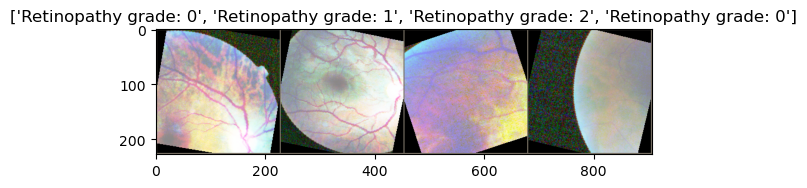

In [135]:

# Get a batch of training data
inputs, labels = next(iter(train_loader))

# Get 4 random indices
indices = np.random.choice(range(inputs.size(0)), size=4, replace=False)

# Select 4 random images and their labels
selected_inputs = inputs[indices]
selected_labels = labels[indices]

# Make a grid from batch
out = torchvision.utils.make_grid(selected_inputs)

# Titles for the images
titles = [f'Retinopathy grade: {label.item()}' for label in selected_labels]

imshow(out, title=titles)

# Implementing the fine-grained classifier:

In [136]:
# import torch.nn as nn
# import torch.optim as optim
# from torchvision.models import resnet50


In [137]:
# # Load pre-trained ResNet-50 model and replace the final classification layer
# model = resnet50(weights='ResNet50_Weights.DEFAULT')
# num_features = model.fc.in_features
# model.fc = nn.Linear(num_features, 4)



In [138]:
# # Send model to GPU if available

# model = model.to(device)

# model.parameters()

In [139]:

# # Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# Implementing the coarse-grained classifier:

In [140]:
# class CoarseClassifier(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(CoarseClassifier, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, num_classes)

#     def forward(self, x):
#         out = self.fc1(x)
#         out = self.relu(out)
#         out = self.fc2(out)
#         return out


In [141]:
# with torch.no_grad():
#     output = model(next(iter(train_loader))[0])
#     print("Output shape:", output.shape)

In [142]:
# # Define the parameters
# input_size = output.shape[1]  # Output size of the fine-grained model
# hidden_size = 128  # Or any other number
# num_classes = 4  # Number of classes for the coarse-grained task

# # Instantiate the model
# coarse_classifier = CoarseClassifier(input_size, hidden_size, num_classes)

In [143]:
# coarse_criterion = nn.CrossEntropyLoss()
# coarse_optimizer = optim.Adam(coarse_classifier.parameters(), lr=0.001)

## Training and combining the classifiers:

In [144]:
# def train_fine_grained_classifier(model, dataloader, criterion, optimizer, device):
#     model.train()
#     running_loss = 0.0
#     correct = 0
#     total = 0

#     for images, labels in dataloader:
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     return running_loss / len(dataloader), correct / total



In [145]:
# def train_coarse_grained_classifier(model, dataloader, criterion, optimizer, device, fine_grained_classifier):
#     model.train()
#     fine_grained_classifier.eval()

#     running_loss = 0.0
#     correct = 0
#     total = 0

#     for images, labels in dataloader:
#         images, labels = images.to(device), labels.to(device)

#         # Get the output probabilities of the fine-grained classifier
#         with torch.no_grad():
#             fine_grained_probs = fine_grained_classifier(images)

#         # Train the coarse-grained classifier
#         optimizer.zero_grad()
#         outputs = model(fine_grained_probs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     train_loss = running_loss / len(dataloader)
#     train_acc = 100 * correct / total

#     return train_loss, train_acc


In [146]:
# def evaluate_classifier(model, dataloader, device):
#     correct = 0
#     total = 0
#     model.eval()  
#     with torch.no_grad():
#         for images, labels in dataloader:
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#     model.train()
#     return correct / total

In [147]:
# def get_model_output_and_labels(model, dataloader, device):
#     model.eval()  
#     outputs_list = []
#     labels_list = []
#     with torch.no_grad():
#         for images, labels in dataloader:
#             images = images.to(device)
#             outputs = model(images)
#             outputs_list.append(outputs)
#             labels_list.append(labels)
#     model.train()
#     return torch.cat(outputs_list), torch.cat(labels_list)


In [148]:
# def validate_combined_classifier(fine_grained_classifier, coarse_classifier, dataloader, device, alpha):
#     fine_grained_classifier.eval()
#     coarse_classifier.eval()

#     correct = 0
#     total = 0

#     with torch.no_grad():
#         for images, labels in dataloader:
#             images, labels = images.to(device), labels.to(device)

#             # Get the output probabilities of both classifiers
#             fine_grained_probs = fine_grained_classifier(images)
#             coarse_probs = coarse_classifier(fine_grained_probs)

#             # Combine the output probabilities
#             combined_probs = alpha * fine_grained_probs + (1 - alpha) * coarse_probs

#             _, predicted = torch.max(combined_probs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     valid_acc = 100 * correct / total

#     return valid_acc


In [149]:
# labels.unique()

In [150]:
# next(iter(train_loader))[1].size()

In [151]:

# num_epochs = 1
# best_alpha = 0.0
# best_valid_acc = 0.0


In [152]:
# train_loss_fg, train_acc_fg = train_fine_grained_classifier(model, train_loader, criterion, optimizer, device)

# print(f'Fine-grained classifier: Train loss: {train_loss_fg:.4f} | Train accuracy: {train_acc_fg:.4f}')

In [153]:
# test_acc_fg = evaluate_classifier(model, test_loader, device)
# print(f'Fine-grained classifier: Test accuracy: {test_acc_fg:.4f}')

In [154]:
# from torch.utils.data import TensorDataset, DataLoader

# # Get output of fine-grained classifier and labels for the training set
# train_output_fg, train_labels = get_model_output_and_labels(model, train_loader, device)

# # Create a new dataloader
# coarse_train_dataset = TensorDataset(train_output_fg.cpu(), train_labels.cpu())
# coarse_train_dataloader = DataLoader(coarse_train_dataset, batch_size=16, shuffle=True)

# # Train the coarse-grained classifier
# train_loss_cg, train_acc_cg = train_coarse_grained_classifier(coarse_classifier, coarse_train_dataloader, coarse_criterion, coarse_optimizer, device, fine_grained_classifier=model)


In [155]:
#   # Train the coarse-grained classifier
# train_loss_cg, train_acc_cg = train_coarse_grained_classifier(coarse_classifier, train_output_fg, coarse_criterion, coarse_optimizer, device,fine_grained_classifier= model)

# print(f'Coarse-grained classifier: Train loss: {train_loss_cg:.4f} | Train accuracy: {train_acc_cg:.4f}')    

In [156]:
# train_loss_cg, train_acc_cg = train_coarse_grained_classifier(coarse_classifier, train_loader, coarse_criterion, coarse_optimizer, device, model)
# print(f'Coarse-grained classifier: Train loss: {train_loss_cg:.4f} | Train accuracy: {train_acc_cg:.4f}')

In [157]:
# test_acc_cg = evaluate_classifier(coarse_classifier, test_loader,device)
# print(f'Coarse-grained classifier: Test accuracy: {test_acc_cg:.4f}')

In [158]:
# for epoch in range(num_epochs):
#     print(0)
#     # Train the fine-grained classifier
#     train_loss_fg, train_acc_fg = train_fine_grained_classifier(model, train_loader, criterion, optimizer, device)
#     print(1)
#     # Evaluate the fine-grained classifier
#     test_acc_fg = evaluate_classifier(model, test_loader, device)
#     print(2)

#     # Get output of fine-grained classifier for the training set
#     train_output_fg = get_model_output(model, train_loader, device)

#     print(3)
#     # Train the coarse-grained classifier
#     train_loss_cg, train_acc_cg = train_coarse_grained_classifier(coarse_classifier, train_output_fg, coarse_criterion, coarse_optimizer, device)
#     print(4)

#     # Get output of fine-grained classifier for the test set
#     test_output_fg = get_model_output(model, test_loader, device)
    
#     # Evaluate the coarse-grained classifier
#     test_acc_cg = evaluate_classifier(coarse_classifier, test_output_fg, device)

#     print(5)
#     # Evaluate the combined classifier
#     valid_acc_combined = 0.0
#     for alpha in np.arange(0.0, 1.1, 0.1):
#         valid_acc = validate_combined_classifier(model, coarse_classifier, test_output_fg, device, alpha)
#         if valid_acc > valid_acc_combined:
#             valid_acc_combined = valid_acc
#             best_alpha = alpha
#     print(6)

#     test_acc_combined = validate_combined_classifier(model, coarse_classifier, test_output_fg, device, best_alpha)

#     print(f'Epoch [{epoch + 1}/{num_epochs}]')
#     print(f'Fine-grained Classifier: Train Loss: {train_loss_fg:.4f}, Train Acc: {train_acc_fg:.4f}, Test Acc: {test_acc_fg:.4f}')
#     print(f'Coarse-grained Classifier: Train Loss: {train_loss_cg:.4f}, Train Acc: {train_acc_cg:.4f}, Test Acc: {test_acc_cg:.4f


In [159]:
# for epoch in range(num_epochs):
#     # Train the fine-grained classifier
#     print(0)

#     train_loss_fg, train_acc_fg = train_fine_grained_classifier(model, train_loader, criterion, optimizer, device)
#     print(1)
#     test_acc_fg = evaluate_classifier(model, test_loader, device,fine_grained_classifier=model)
#     print(2)

#     # Train the coarse-grained classifier
#     train_loss_cg, train_acc_cg = train_coarse_grained_classifier(coarse_classifier, train_loader, coarse_criterion, coarse_optimizer, device, model)
#     print(3)

#     test_acc_cg = evaluate_classifier(coarse_classifier, test_loader, device,fine_grained_classifier=model)
#     print(4)


#     # Evaluate the combined classifier
#     valid_acc_combined = 0.0
#     for alpha in np.arange(0.0, 1.1, 0.1):
#         valid_acc = validate_combined_classifier(model, coarse_classifier, test_loader, device, alpha)
#         if valid_acc > valid_acc_combined:
#             valid_acc_combined = valid_acc
#             best_alpha = alpha

#     print(5)

#     test_acc_combined = validate_combined_classifier(model, coarse_classifier, test_loader, device, best_alpha)
#     print(6)

#     print(f'Epoch [{epoch + 1}/{num_epochs}]')
#     print(f'Fine-grained Classifier: Train Loss: {train_loss_fg:.4f}, Train Acc: {train_acc_fg:.4f}, Test Acc: {test_acc_fg:.4f}')
#     print(f'Coarse-grained Classifier: Train Loss: {train_loss_cg:.4f}, Train Acc: {train_acc_cg:.4f}, Test Acc: {test_acc_cg:.4f}')
#     print(f'Combined Classifier: Best Alpha: {best_alpha:.2f}, Test Acc: {test_acc_combined:.4f}')
#     print('-' * 80)

In [163]:
# # Train the coarse-grained classifier
# num_epochs = 10
# for epoch in range(num_epochs):
#     train_loss, train_acc = train_coarse_grained_classifier(coarse_classifier, train_loader, coarse_criterion, coarse_optimizer, device, model)
#     valid_acc = validate_combined_classifier(model, coarse_classifier, test_loader, device, 0.5)
#     print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Valid Acc: {valid_acc:.4f}')


In [164]:
# Required Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Fine-grained Model
class FineGrainedClassifier(nn.Module):
    def __init__(self, pretrained_model):
        super(FineGrainedClassifier, self).__init__()
        self.pretrained = pretrained_model

    def forward(self, x):
        return self.pretrained(x)

# Coarse-grained Model
class CoarseGrainedClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CoarseGrainedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # out = self.fc1(x)
        # out = self.relu(out)
        # out = self.fc2(out)
        return  self.fc2(self.relu(self.fc1(x)))

# Function for Training
def train(model, criterion, optimizer, dataloader):
    model.train()
    total_loss = 0.0
    total_correct = 0
    total_images = 0
    
    for batch in dataloader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        
        total_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == labels).sum().item()
        total_images += images.size(0)

        # clear memory
        torch.cuda.empty_cache()

    return total_loss / total_images, total_correct / total_images

# Function for Training Coarse-grained model
def train_coarse(model, criterion, optimizer, dataloader, fine_model):
    model.train()
    total_loss = 0.0
    total_correct = 0
    total_images = 0
    
    for batch in dataloader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        
        with torch.no_grad():
            fine_output = fine_model(images)
        
        outputs = model(fine_output)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        
        total_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == labels).sum().item()
        total_images += images.size(0)

        # clear memory
        torch.cuda.empty_cache()

    return total_loss / total_images, total_correct / total_images



# Instantiate the fine-grained classifier
pretrained_model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet50', weights='ResNet50_Weights.IMAGENET1K_V1')
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, 4)
fine_grained_classifier = FineGrainedClassifier(pretrained_model)
fine_grained_classifier.to(device)

# Train the fine-grained classifier
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fine_grained_classifier.parameters(), lr=0.001)


num_epochs = 100


for epoch in range(num_epochs):
    loss, accuracy = train(fine_grained_classifier, criterion, optimizer, train_loader)
    if(epoch%10==0):
     print(f"Fine-Grained - Epoch: {epoch+1}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Instantiate the coarse-grained classifier
coarse_grained_classifier = CoarseGrainedClassifier(4, 64, 4)
coarse_grained_classifier.to(device)

# Train the coarse-grained classifier
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(coarse_grained_classifier.parameters(), lr=0.001)
for epoch in range(num_epochs):
    loss, accuracy = train_coarse(coarse_grained_classifier, criterion, optimizer, train_loader, fine_grained_classifier)
    if(epoch%10==0):
     print(f"Coarse-Grained - Epoch: {epoch+1}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Using cache found in /Users/humzakhawar/.cache/torch/hub/pytorch_vision_v0.9.0


Fine-Grained - Epoch: 1, Loss: 1.3528, Accuracy: 0.4448
Fine-Grained - Epoch: 11, Loss: 0.9947, Accuracy: 0.6021
Fine-Grained - Epoch: 21, Loss: 0.9300, Accuracy: 0.6260
Fine-Grained - Epoch: 31, Loss: 0.9180, Accuracy: 0.6323
Fine-Grained - Epoch: 41, Loss: 0.8318, Accuracy: 0.6677
Fine-Grained - Epoch: 51, Loss: 0.8522, Accuracy: 0.6646
Fine-Grained - Epoch: 61, Loss: 0.8207, Accuracy: 0.6687
Fine-Grained - Epoch: 71, Loss: 0.8203, Accuracy: 0.6781
Fine-Grained - Epoch: 81, Loss: 0.7546, Accuracy: 0.6927
Fine-Grained - Epoch: 91, Loss: 0.7980, Accuracy: 0.6708
Coarse-Grained - Epoch: 1, Loss: 1.0088, Accuracy: 0.5865
Coarse-Grained - Epoch: 11, Loss: 0.7164, Accuracy: 0.7094
Coarse-Grained - Epoch: 21, Loss: 0.7211, Accuracy: 0.7115
Coarse-Grained - Epoch: 31, Loss: 0.7084, Accuracy: 0.7167
Coarse-Grained - Epoch: 41, Loss: 0.6809, Accuracy: 0.7323
Coarse-Grained - Epoch: 51, Loss: 0.7150, Accuracy: 0.7000
Coarse-Grained - Epoch: 61, Loss: 0.7041, Accuracy: 0.7135
Coarse-Grained - Ep

# Testing and Evaluating the model

In [165]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import torch.nn.functional as F

# Function for Testing with output probabilities
def test_with_probs(model, dataloader, fine_model=None, num_classes=4):
    model.eval()
    all_outputs = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)

            if fine_model:
                images = fine_model(images)

            outputs = model(images)
            softmax_outputs = F.softmax(outputs, dim=1)  # Apply softmax
            all_outputs.append(softmax_outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    # Convert to numpy arrays for convenience
    all_outputs = np.concatenate(all_outputs)
    all_labels = np.concatenate(all_labels)

    # Calculate confusion matrix
    all_preds = np.argmax(all_outputs, axis=1)
    cm = confusion_matrix(all_labels, all_preds)

    # Calculate AUC-ROC for each class
    roc_auc = roc_auc_score(all_labels, all_outputs, multi_class='ovr')

    return all_outputs, all_labels, cm, roc_auc


In [166]:
num_classes = 4

In [167]:
# Get output probabilities, labels, confusion matrices and AUC-ROCs for the classifiers
fine_probs, fine_labels, fine_cm, fine_roc_auc = test_with_probs(fine_grained_classifier, test_loader)
coarse_probs, _, coarse_cm, coarse_roc_auc = test_with_probs(coarse_grained_classifier, test_loader, fine_grained_classifier)

print(f"Fine-Grained Classifier - AUC-ROC: {fine_roc_auc}")
print(f"Coarse-Grained Classifier - AUC-ROC: {coarse_roc_auc}")


Fine-Grained Classifier - AUC-ROC: 0.7709244383985212
Coarse-Grained Classifier - AUC-ROC: 0.7843064039206387


In [168]:
# Function to calculate sensitivity (recall) and specificity
def compute_metrics(cm):
    tp = np.diag(cm)
    fp = np.sum(cm, axis=0) - tp
    fn = np.sum(cm, axis=1) - tp
    tn = np.sum(cm) - (fp + fn + tp)

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return sensitivity, specificity

# Compute and print sensitivity and specificity for each class
fine_sensitivity, fine_specificity = compute_metrics(fine_cm)
coarse_sensitivity, coarse_specificity = compute_metrics(coarse_cm)

for i in range(num_classes):
    print(f"Class {i} - Fine-Grained: Sensitivity: {fine_sensitivity[i]}, Specificity: {fine_specificity[i]}")
    print(f"Class {i} - Coarse-Grained: Sensitivity: {coarse_sensitivity[i]}, Specificity: {coarse_specificity[i]}")


Class 0 - Fine-Grained: Sensitivity: 0.8666666666666667, Specificity: 0.6518518518518519
Class 0 - Coarse-Grained: Sensitivity: 0.8857142857142857, Specificity: 0.6370370370370371
Class 1 - Fine-Grained: Sensitivity: 0.11538461538461539, Specificity: 0.9579439252336449
Class 1 - Coarse-Grained: Sensitivity: 0.19230769230769232, Specificity: 0.9813084112149533
Class 2 - Fine-Grained: Sensitivity: 0.3157894736842105, Specificity: 0.8797814207650273
Class 2 - Coarse-Grained: Sensitivity: 0.43859649122807015, Specificity: 0.8633879781420765
Class 3 - Fine-Grained: Sensitivity: 0.6538461538461539, Specificity: 0.9148936170212766
Class 3 - Coarse-Grained: Sensitivity: 0.6346153846153846, Specificity: 0.9680851063829787


In [169]:
# Combine probabilities and calculate accuracy for different alphas
for alpha in np.arange(0.0, 1.1, 0.1):
    ensemble_probs = alpha * fine_probs + (1 - alpha) * coarse_probs
    ensemble_preds = np.argmax(ensemble_probs, axis=1)
    ensemble_accuracy = np.mean(ensemble_preds == fine_labels)
    print(f"Ensemble Accuracy for Alpha={alpha}: {ensemble_accuracy}")


Ensemble Accuracy for Alpha=0.0: 0.65
Ensemble Accuracy for Alpha=0.1: 0.6541666666666667
Ensemble Accuracy for Alpha=0.2: 0.6583333333333333
Ensemble Accuracy for Alpha=0.30000000000000004: 0.6583333333333333
Ensemble Accuracy for Alpha=0.4: 0.6625
Ensemble Accuracy for Alpha=0.5: 0.65
Ensemble Accuracy for Alpha=0.6000000000000001: 0.6375
Ensemble Accuracy for Alpha=0.7000000000000001: 0.6208333333333333
Ensemble Accuracy for Alpha=0.8: 0.6208333333333333
Ensemble Accuracy for Alpha=0.9: 0.6208333333333333
Ensemble Accuracy for Alpha=1.0: 0.6083333333333333


In [170]:
# Save the models
torch.save(fine_grained_classifier.state_dict(), 'fine_grained_classifier.pth')
torch.save(coarse_grained_classifier.state_dict(), 'coarse_grained_classifier.pth')


In [171]:
# # Required Libraries
# import torch
# import numpy as np
# from sklearn.metrics import confusion_matrix, roc_auc_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Function for model evaluation
# def evaluate(model, dataloader):
#     model.eval()
#     labels = []
#     preds = []
#     probs = []

#     with torch.no_grad():
#         for batch in dataloader:
#             images, batch_labels = batch
#             images = images.to(device)
#             batch_labels = batch_labels.to(device)

#             batch_preds = model(images)
#             batch_probs = torch.softmax(batch_preds, dim=1).cpu().numpy()

#             _, batch_preds = torch.max(batch_preds.data, 1)

#             labels.extend(batch_labels.cpu().numpy())
#             preds.extend(batch_preds.cpu().numpy())
#             probs.extend(batch_probs)

#             # clear memory
#             torch.cuda.empty_cache()

#     return np.array(labels), np.array(preds), np.array(probs)

# # Evaluate classifiers
# fine_labels, fine_preds, fine_probs = evaluate(fine_grained_classifier, test_loader)
# coarse_labels, coarse_preds, coarse_probs = evaluate(coarse_grained_classifier, test_loader)

# ensemble_labels = fine_labels  # Since they are the same for fine and coarse-grained classifiers
# ensemble_probs = np.mean([fine_probs, coarse_probs], axis=0)
# _, ensemble_preds = np.argmax(ensemble_probs, axis=1)

# # Compute confusion matrices
# fine_cm = confusion_matrix(fine_labels, fine_preds)
# coarse_cm = confusion_matrix(coarse_labels, coarse_preds)
# ensemble_cm = confusion_matrix(ensemble_labels, ensemble_preds)

# # Plot confusion matrices
# sns.heatmap(fine_cm, annot=True, fmt='d')
# plt.show()

# sns.heatmap(coarse_cm, annot=True, fmt='d')
# plt.show()

# sns.heatmap(ensemble_cm, annot=True, fmt='d')
# plt.show()

# # Compute AUC-ROC
# fine_roc_auc = roc_auc_score(fine_labels, fine_probs, multi_class='ovr')
# coarse_roc_auc = roc_auc_score(coarse_labels, coarse_probs, multi_class='ovr')
# ensemble_roc_auc = roc_auc_score(ensemble_labels, ensemble_probs, multi_class='ovr')

# # Print AUC-ROC scores
# print(f"Fine-Grained Classifier - AUC-ROC: {fine_roc_auc}")
# print(f"Coarse-Grained Classifier - AUC-ROC: {coarse_roc_auc}")
# print(f"Ensemble Classifier - AUC-ROC: {ensemble_roc_auc}")


# Random checking

In [172]:
unique_labels = next(iter(train_loader))[1].unique()
print(f"Unique labels in the dataset: {unique_labels}")


Unique labels in the dataset: tensor([0, 1, 2, 3])


In [173]:
print(f"Output features of fine-grained model: {fine_grained_classifier.pretrained.fc.out_features}")
print(f"Output features of coarse-grained model: {coarse_grained_classifier.fc2.out_features}")


Output features of fine-grained model: 4
Output features of coarse-grained model: 4


In [174]:
num_classes = len(unique_labels)
print(f"Number of classes: {num_classes}")


Number of classes: 4


# Script for model on website

In [175]:
# Required Libraries
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image

# Fine-grained Model
class FineGrainedClassifier(nn.Module):
    def __init__(self, pretrained_model):
        super(FineGrainedClassifier, self).__init__()
        self.pretrained = pretrained_model

    def forward(self, x):
        return self.pretrained(x)

# Coarse-grained Model
class CoarseGrainedClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CoarseGrainedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        return  self.fc2(self.relu(self.fc1(x)))

# Load the pretrained model
pretrained_model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet50', pretrained=True)
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, 4)

# Load the fine-grained model
fine_grained_classifier = FineGrainedClassifier(pretrained_model)
fine_grained_classifier.load_state_dict(torch.load('fine_grained_classifier.pth'))
fine_grained_classifier.eval()

# Load the coarse-grained model
coarse_grained_classifier = CoarseGrainedClassifier(4, 64, 4)
coarse_grained_classifier.load_state_dict(torch.load('coarse_grained_classifier.pth'))
coarse_grained_classifier.eval()

# Preprocess function
def preprocess(image_path):
    image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = preprocess(image)
    image = torch.unsqueeze(image, 0)
    return image

# Predict function
def predict(image_path):
    image = preprocess(image_path)
    fine_output = fine_grained_classifier(image)
    coarse_output = coarse_grained_classifier(fine_output.detach())
    _, fine_pred = torch.max(fine_output.data, 1)
    _, coarse_pred = torch.max(coarse_output.data, 1)
    return fine_pred.item(), coarse_pred.item()

# Example usage
image_path = 'messidor/Base11/20051019_38557_0100_PP.tif'
fine_pred, coarse_pred = predict(image_path)
print(f"Fine-grained prediction: {fine_pred}")
print(f"Coarse-grained prediction: {coarse_pred}")


Using cache found in /Users/humzakhawar/.cache/torch/hub/pytorch_vision_v0.9.0
/Users/humzakhawar/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/humzakhawar/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Fine-grained prediction: 0
Coarse-grained prediction: 0
